<a href="https://colab.research.google.com/github/gyhou/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/GH_143_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

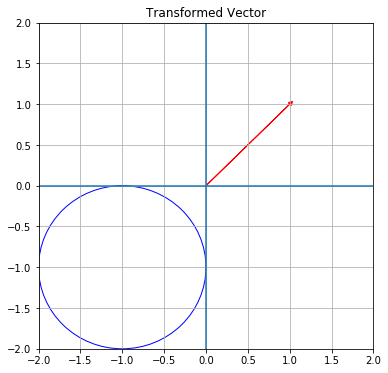

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
plt.grid()

a = [1,1]

plt.arrow(0,0, a[0], a[1], head_width=.05, head_length=0.05, color ='red')
circle1 = plt.Circle((-1, -1), 1, color='b', fill=False)
ax.add_artist(circle1)

plt.xlim(-2,2)          
plt.ylim(-2,2)
ax.axhline(y=0)
ax.axvline(x=0)

plt.title("Transformed Vector")
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Graphs that don't pass the vertical line test are not considered "functions" because more than one input is mapped to the same output.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

> Relation 1: Not a function - Input 1 has 2 outputs (2,3).

> Relation 2 is a function, no two inputs is mapped to the same output.

> Relation 3: Not a function - Input 9 has 2 outputs (4,6).

> Relation 4: Not a function - Input 6 has 2 outputs (2,4).

> Relation 5: Not a function - Input 2 has 3 outputs (6,7,4).

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}


*   Domain/input $ m(𝑥_1,𝑥_2,𝑥_3) $ has 3 dimensions and 3 codmain/range/output.
*   Domain/input $n(𝑥_1,𝑥_2,𝑥_3,𝑥_4) $ has 4 dimensions and 2 codmain/range/output.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Kernel is a function from the low dimensional space into a higher dimensional space.

\begin{align}
r(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3,x_1x_2,2x_1)
\end{align}

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
T(p) = \begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\\
T(q) = \begin{bmatrix} 4 & 1 & 2\\ -1 & 2 & 3\\5 & 1 & -2\end{bmatrix}
\\
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [20]:
T_p = [[1,3],[-1,2]]
p_v = [[2],[3]]

np.dot(T_p,p_v)

array([[11],
       [ 4]])

In [22]:
T_q = [[4,1,2],[-1,2,3],[5,1,-2]]
q_v = [[1],[2],[3]]

np.dot(T_q,q_v)

array([[12],
       [12],
       [ 1]])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.


*   **eigenvectors**: points in a direction that is stretched by the transformation and the **eigenvalue** is the factor by which it is stretched. If the **eigenvalue** is negative, the direction is reversed.
*   **eigenvalues**: can get longer or shorter but can't change direction


# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?



1.   More difficult to explore the data and create visualizations
2.   Diminishing returns to adding features (increased redundancy)
3.   Increased computational workload
4.   Increased sparcity of data - Measures of distance (Euclidean) lose meaning
5.   Low number of observations relative to dimensions increases the risk of overfitting



## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?


*   Should make sure that you have 5 times the number of observations as you have parameters in your model



# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [23]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


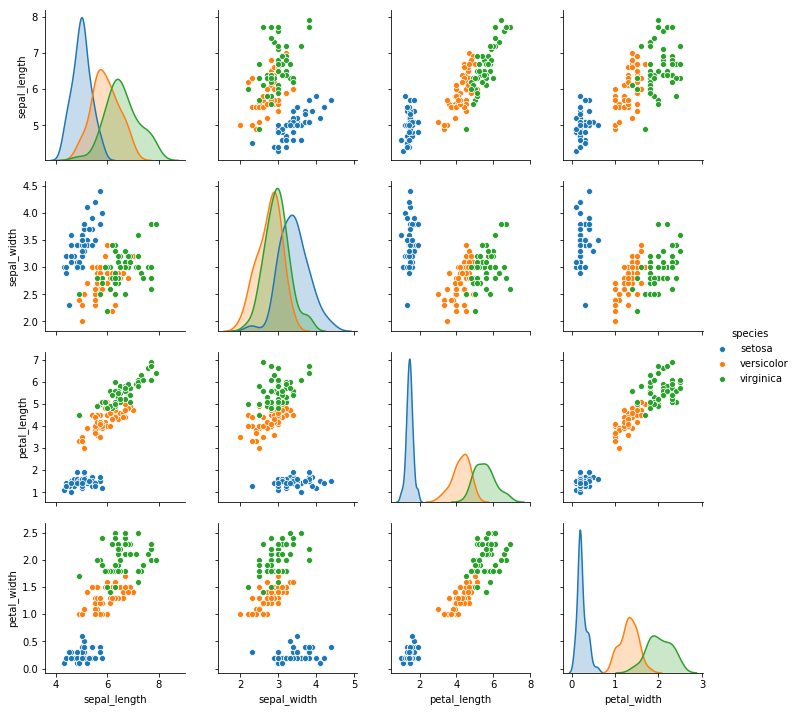

In [27]:
sns.pairplot(df, vars=df.columns[:-1], hue="species")

In [0]:
# iris = PSQ^T
# P = eigenbasis(vector) covariance - rotate
# S = eigenvalues - scaler
# Q^T = rotation

from numpy.linalg import eig
import numpy.linalg
from sklearn.decomposition import PCA


In [0]:
help(eig)

In [34]:
# covariance

cov = df.cov()
cov

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


In [0]:
eigenvalues, eigenvectors = eig(cov)

In [87]:
eigenvectors

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [51]:
# orthonormal: A^-1 = A.T

print('inverse of eigenvectors: \n', np.linalg.inv(eigenvectors))
print('transpose of eigenvectors: \n', eigenvectors.T)
np.testing.assert_almost_equal(eigenvectors.T,np.linalg.inv(eigenvectors))

inverse of eigenvectors: 
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]
transpose of eigenvectors: 
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]


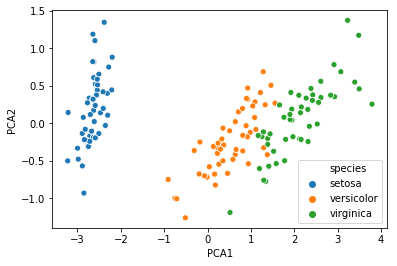

In [76]:
sns.scatterplot(x = 'PCA1', y='PCA2', data = df_pca, hue='species');
# PCA1 = direction of strongest variance
# PCA2 = direction of 2nd strongest variance

In [52]:
np.diag(eigenvalues)

array([[4.22484077, 0.        , 0.        , 0.        ],
       [0.        , 0.24224357, 0.        , 0.        ],
       [0.        , 0.        , 0.07852391, 0.        ],
       [0.        , 0.        , 0.        , 0.02368303]])

In [48]:
np.linalg.det(eigenvectors)

-1.0

In [0]:
# pca = PCA(n_components=2)
pca4 = PCA(n_components=4)

In [56]:
x = df.drop('species', axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
# pca1 explains 92% of the variance
# pca2 explains 5% of the variance
pca4.explained_variance_ratio_
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [68]:
pca.fit_transform(x)
# estimator object: an estimator is an object with a .fit method and a .transform
# call .fit on known data
# call .transform on new observations
# inference
# pca.inverse_transform(output)

df_pca = pd.DataFrame(pca.fit_transform(x), columns=['PCA1','PCA2'])
df_pca['species'] = df['species']
print(df_pca.shape)
df_pca.head()

(150, 3)


,PCA1,PCA2,species
0,-2.684207,0.326607,setosa
1,-2.715391,-0.169557,setosa
2,-2.889820,-0.137346,setosa
3,-2.746437,-0.311124,setosa
4,-2.728593,0.333925,setosa


In [79]:
y = pca.fit_transform(x)
pca.inverse_transform([2,2])

array([7.87959245, 4.34888696, 5.12027607, 1.76694158])

In [86]:
pca3 = PCA(n_components=3)
pca3.fit(x)
pca3.inverse_transform([2,2,2])

array([6.7175979 , 5.54172314, 5.26532422, 2.8650634 ])

In [62]:
df_pca4 = pd.DataFrame(pca4.fit_transform(x), columns=['PCA1','PCA2','PCA3','PCA4'])
print(df_pca4.shape)
df_pca4.head()

(150, 4)


,PCA1,PCA2,PCA3,PCA4
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129


In [0]:
iris = PSQ^T
P = eigenbasis(vector) covariance - rotate
S = eigenvalues - scaler
Q^T = rotation

### 1) Separate your data into X and Y, variables.

Remember that the y variable is the "label" or the "target" it's the thing that we want to predict. our X variables are all of the features of our data that are going ot help us to predict Y.

### 2) Center each column at 0 by subtracting its mean.

Take the matrix of independent variables $X$ and, for each column, subtract the mean of that column from each entry. (This ensures that each column has a mean of zero.)

If we don't do this then it will appear as if one component explains most of the variance in the data and the other components explain very little.  

### 3) Divide each column by its standard deviation.

This completes the process of "standardizing" our data - giving it a mean of 0 and a standard deviation of 1. Just like we standardized our variance and covariance, this now makes the variances of our different features comparable and removes some of the concerns that were brought up when we talked about the rotated elipse of points.
 
We'll call the new standardized matrix the $Z$ matrix.

### 4) Calculate the Variance-Covariance matrix of Z. 

Do this by calculating $Z^{T}Z$ Mind blown! - Multiplying a matrix by its transpose yields the variance-covariance matrix. 

### 5) Calculate the Eigenvectors and Eigenvalues of the Variance-Covariance Matrix.

What are the Eigenvectors and Eigenvalues of the Variance-Covariance Matrix? The eigenvectors are those that run along the dimensions that maximize the variance along that dimension. Remember our rotated elipse example? When we moved our elipse off of the x and y axis we then didn't know what line we should project the points onto so that they we could collapse the dimension of least variance. Well now we do!

### 6) Sort the Eigenvalue and Eigenvector Pairs.

We'll sort our eigenvalue eigenvector pairs that resulted from the eigendecomposition of the variance-covariance matrix. We'll sort them by their eigenvalues in descending order. Since the eigenvalues tell us how to scale an eigenvector. The largest eigenvalue corresponds to the direction of greatest variance in the data. The eigenvalue eigenvector pair with the largest eigenvalue will be Principal Component 1

### 7) Use a matrix transformation to project the datapoints onto our eigenvector subspaces. 

This final step is what makes it so that if we plot our transformed data our principal components will be alined with the axis of our graph. 

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)